In [12]:
import csv

data = []

with open('crusoeData.csv', 'r', encoding='utf8') as toClean:
    reader = csv.reader(toClean)
    for row in reader:
        data.append(row)
        
data[0].append('year')
        
for i, dat in enumerate(data):
    if '|' in dat[4]:
        data[i][4] = dat[4].split(' | ')

data

[['oclc', 'language', 'author', 'title', 'publisher', 'year'],
 ['00012341',
  'eng',
  'Ellis, Frank H. | (Frank Hale), | 1916-2007, | compiler.',
  'Twentieth century interpretations of Robinson Crusoe; a collection of critical essays, edited by Frank H. Ellis.',
  ['Englewood Cliffs, N.J.,', 'Prentice-Hall', '[1969]']],
 ['00014279',
  'eng',
  'None',
  'English plays of the nineteenth century / edited by Michael R. Booth.',
  ['Oxford :', 'Clarendon Press,', '1969-1976.']],
 ['00129953',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'Robinson Crusoe. The farther adventures of Robinson Crusoe. Introd. by Frederick Brereton. Original illus. by Paul Gaisford.',
  ['[London]', 'Heron Books', '[1970]']],
 ['00327479',
  'eng',
  'Woolf, Virginia, | 1882-1941.',
  'The second Common reader / by Virginia Woolf ...',
  ['New York :', 'Harcourt, Brace and Company,', '[©1932]']],
 ['00353586',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'The life and strange adventures of Robinson Crusoe / 

In [3]:
len(data)

15726

In [13]:
import re

#decimalDens=[1000,500,100,50,10,5,1]
#romanDens=["M","D","C","L","X","V","I"]

#def romantoDec(s):
#    print(s)

good, bad = 0, 0
for j, dat in enumerate(data):
    isYear = False
    for da in dat[4]:
        if not isinstance(dat[4], list):
            da = dat[4]
        if re.search('(17|18|19|20)(\\d{2}|\\d(-|\\?))', da):
            i = re.search('(17|18|19|20)(\\d{2}|\\d(-|\\?))', da).start()
            #print(da[i:i+4])
            good+=1
            isYear = True
            data[j].append(da[i:i+4])
            break
        #if 'M' in da and 'D' in da and 'CC' in da:
        #    print((da.split('.')))
    if isYear:
        continue
    #if 'None' not in dat[4]:
    #    print(str(dat[4]) + " no year found")
    bad+=1

print(good, bad)
data

13918 1808


[['oclc', 'language', 'author', 'title', 'publisher', 'year'],
 ['00012341',
  'eng',
  'Ellis, Frank H. | (Frank Hale), | 1916-2007, | compiler.',
  'Twentieth century interpretations of Robinson Crusoe; a collection of critical essays, edited by Frank H. Ellis.',
  ['Englewood Cliffs, N.J.,', 'Prentice-Hall', '[1969]'],
  '1969'],
 ['00014279',
  'eng',
  'None',
  'English plays of the nineteenth century / edited by Michael R. Booth.',
  ['Oxford :', 'Clarendon Press,', '1969-1976.'],
  '1969'],
 ['00129953',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'Robinson Crusoe. The farther adventures of Robinson Crusoe. Introd. by Frederick Brereton. Original illus. by Paul Gaisford.',
  ['[London]', 'Heron Books', '[1970]'],
  '1970'],
 ['00327479',
  'eng',
  'Woolf, Virginia, | 1882-1941.',
  'The second Common reader / by Virginia Woolf ...',
  ['New York :', 'Harcourt, Brace and Company,', '[©1932]'],
  '1932'],
 ['00353586',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'The life and 

In [5]:
allcities = []

with open('worldcities.txt', 'r', encoding='utf8') as cityFile:
    citylist = cityFile.read()
    for thing in citylist.split(',')[1::6]:
        allcities.append(thing)

In [6]:
allcities = sorted(allcities)
print('baltimore' in allcities)
len(allcities)

True


3173959

In [7]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [14]:
from fuzzywuzzy import fuzz

data[0].append('pubcity')
cities = []
ct = 0

def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False
    
    while first<=last and not found:
        midpoint = (first + last)//2
        
        #if item in alist[midpoint]:
        if fuzz.token_set_ratio(item, alist[midpoint]) > 85 or levenshtein(item, alist[midpoint]) == 2:    
            found = True
            cities.append(alist[midpoint])
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    return found

for k, dat in enumerate(data):
    isPlace = False # set isPlace to False
    
    if k == 0: # skip header
        continue
        
    if len(dat[4][0]) > 1: # check list or string
        cit = dat[4][0]
    else:
        cit = dat[4]
    
    if 'None' in cit or 'not identified' in cit or 's.l.' in cit.lower(): # skip negatives
        continue
    
    if cit[-1] == ',': # clean city of punctuation, special cases
        cit = cit[:-1]
    if cit[-1] == ':':
        cit = cit[:-1].strip()
    if cit[0]+cit[-1] == '[]':
        cit = cit[1:-1]
    elif cit[0] == '[':
        cit = cit[1:]
    if ',' in cit:
        cit = cit.split(',')[0]
    if cit[-1] == ';':
        cit = cit[:-1].strip()
    if '(' in cit[1:]:
        cit = cit[:cit.find('(')]
    if '[' in cit[1:]:
        cit = cit[:cit.find('[')]
    if '-' in cit:
        cit = cit.replace('-', ' ')
    if ':' in cit:
        cit = cit.replace(':','')
    if 'Mt.' in cit:
        cit = cit.replace('Mt.','Mount')
    if 'ü' in cit:
        cit = cit.replace('ü','u')
    if 'ö' in cit:
        cit = cit.replace('ö','o')
    if 'ravenha' in cit:
        cit = "'s-Gravenhage'"
    if 'mondswort' in cit:
        cit = 'London'
    for checks in ['London','Boston','Paris','Amsterdam','Venezia','Leipzig','Worcester']:
        if checks in cit:
            cit = checks
    cit = cit.strip()
    
    eit = '' # deal with special characters
    for l, ch in enumerate(cit):
        num = ord(ch)
        if num > 255:
            continue
        appendNew = False
        for entry in asciidict:
            for ent in entry[0]:
                if isinstance(ent,int):
                    if num == ent:
                        appendNew = True
                        eit += entry[1]
                        break
                else:
                    if ent[0] <= num <= ent[1]:
                        appendNew = True
                        eit += entry[1]
        if not appendNew:
            eit += cit[l]
    cit = eit
    
    if re.search('(17|18|19|20)(\\d{2}).*', cit):
            i = re.search('(17|18|19|20)(\\d{2}).*', cit).start()
            data[k][5] = cit[i:i+4]
            continue
            
    if cit[:2] == 'A ':
        cit = cit[2:]

    if binarySearch(allcities, cit.lower()):
        data[k].append(cit)
        cities.append(cit)
        ct+=1
    else:
        continue
            
    for place in cities: # find cityname in list of cities
        if place in cit:
            data[k].append(cit)
            isPlace = True
            ct+=1
            break
    
    if isPlace: # break if city found
        continue

print(ct)
print(cities)
#data        

26302
['englewood', 'Englewood Cliffs', 'oxford', 'Oxford', 'london borough of brent', 'London', 'new york', 'New York', 'garden city', 'Garden City', 'boste', 'Boston', 'boste', 'Boston', 'boste', 'Boston', 'london borough of brent', 'London', 'palo', 'Palo Alto', 'garden city', 'Garden City', 'new york', 'New York', 'reading center', 'Reading', 'new york', 'New York', 'annapolis', 'Annapolis', 'london borough of brent', 'London', 'new york', 'New York', 'new york', 'New York', 'london borough of brent', 'London', 'london borough of brent', 'London', 'paris pines', 'Paris', 'stuttgart', 'Stuttgart', 'new york', 'New York', 'new york', 'New York', 'philadelphia', 'Philadelphia', 'new york', 'New York', 'london borough of brent', 'London', 'madras', 'Madrid', 'philadelphia', 'Philadelphia', 'london borough of brent', 'London', 'new york', 'New York', 'new york', 'New York', 'anchorage', 'Anchorage', 'new york', 'New York', 'new york', 'New York', 'london borough of brent', 'London', 'ne

In [20]:
del data[0][-1]
del data[0][-1]
        
data

[['oclc',
  'language',
  'author',
  'title',
  'publisher',
  'year',
  'pubcity',
  'latitude',
  'longitude'],
 ['00012341',
  'eng',
  'Ellis, Frank H. | (Frank Hale), | 1916-2007, | compiler.',
  'Twentieth century interpretations of Robinson Crusoe; a collection of critical essays, edited by Frank H. Ellis.',
  ['Englewood Cliffs, N.J.,', 'Prentice-Hall', '[1969]'],
  '1969',
  'Englewood Cliffs'],
 ['00014279',
  'eng',
  'None',
  'English plays of the nineteenth century / edited by Michael R. Booth.',
  ['Oxford :', 'Clarendon Press,', '1969-1976.'],
  '1969',
  'Oxford'],
 ['00129953',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'Robinson Crusoe. The farther adventures of Robinson Crusoe. Introd. by Frederick Brereton. Original illus. by Paul Gaisford.',
  ['[London]', 'Heron Books', '[1970]'],
  '1970',
  'London'],
 ['00327479',
  'eng',
  'Woolf, Virginia, | 1882-1941.',
  'The second Common reader / by Virginia Woolf ...',
  ['New York :', 'Harcourt, Brace and Company,'

In [9]:
asciidict = [[[97, (192,198), (224,229)], 'a'], [[223], 'b'], [[199,231], 'c'], [[(200,203),(232,235)], 'e'], [[(204,207),(236,239)], 'i'], [[209,241], 'n'], [[(210,214),216,240,(242,246),248], 'o'], [[(217,220),(249,252)], 'u'], [[221,253,255], 'y']]

dit = 'São Paulo'
eit = ''
for l, ch in enumerate(dit):
    num = ord(ch)
    if num > 255:
        continue
    appendNew = False
    for entry in asciidict:
        for ent in entry[0]:
            if isinstance(ent,int):
                if num == ent:
                    appendNew = True
                    print(entry[1])
                    eit += entry[1]
                    break
            else:
                if ent[0] <= num <= ent[1]:
                    appendNew = True
                    print(entry[1])
                    eit += entry[1]
    if not appendNew:
        print(dit[l])
        eit += dit[l]

                    
eit

S
a
o
 
P
a
u
l
o


'Sao Paulo'

In [21]:
toGeo = []
ct = 0

for dat in data:
    if len(dat) == 7:
        #print(dat)
        if dat[6] not in toGeo:
            toGeo.append(dat[6])
            
print(ct)
toGeo = toGeo[1:]
print(toGeo)

0
['Oxford', 'London', 'New York', 'Garden City', 'Boston', 'Palo Alto', 'Reading', 'Annapolis', 'Paris', 'Stuttgart', 'Philadelphia', 'Madrid', 'Anchorage', 'Nurnberg', 'Chicago', 'Washington', 'Barcelona', 'Habana', 'Mount Vernon', 'Belmont', 'Cambridge', 'Wien', 'Ann Arbor', 'New Haven', 'Cooperstown', 'Springfield', 'Ithaca', 'Baltimore', 'Windham', 'Osnabruck', 'Corito', 'Buenos Aires', 'Mexico', 'Franklin Center', 'Milwaukee', 'Amsterdam', 'Moskva', 'Newark', 'Leipzig', 'Bilboa', 'Bratislava', 'Bilbao', 'Newburyport', 'New York City', 'Hartford', 'Frankfurt am Main', 'Nancy', 'San Antonio', 'Minneapolis', 'Birmingham', 'Cleveland', 'Mount Kisco', 'Brunswick Productions', 'Otley', 'San Francisco', 'West Haven', 'Dublin', 'Valletta?', 'Exeter', 'Zagreb', 'Praha', 'Budapest', 'Maidenhead', 'Mahwah', 'Oslo', 'Bucuresti', 'Helsinki', 'Loughborough', 'Firenze', 'Holyoke', 'Cripple Creek', 'Petrograd', 'Warszawa', 'Toronto', 'Hong Kong', 'Boulogne Billancourt', 'Closter', 'Aperira', 'To

In [41]:
from geopy.geocoders import Nominatim
import time
from geopy.exc import GeocoderTimedOut
import sys

geolocator = Nominatim()
latlongs = []
check = 0

def getloc(city):
    try:
        time.sleep(2)
        return(geolocator.geocode(city))
    except GeocoderTimedOut:
        getloc(city)
        
for place in toGeo[442:]:
    place.replace('?','')
    location = getloc(place)
    if location is not None:
        print(place, location.latitude, location.longitude)
        latlongs.append([place, location.latitude, location.longitude])
    else:
        print(place + ' has no coordinates')

Glasgow? 55.856656 -4.2435817
Ottawa 45.421106 -75.690308
Hollywood 34.1028268 -118.3299899
Det danske Forlag has no coordinates
Hagerup 55.8257614 12.1370923
Aarhus 56.1496278 10.2134046
Bruges 44.8842379 -0.6111474
Holte 55.8125143 12.4687513
Dhaka 23.7593572 90.3788136
Mont Royal 45.5086232 -73.5900917
San Sebastian 43.3224219 -1.9838889
Binghamton 42.096968 -75.914341
Aartselaar 51.133297 4.3870241
Uddevalla 58.3490555 11.9382855
Kingston on Thames 51.6743611 -1.2821216
Eugene 44.0505054 -123.0950506
Whitefish 48.4107966 -114.3346265
Manhattan Beach 33.895497 -118.400345
Baku 40.3759646 49.8325808
Warrington 53.4018582 -2.5680223597163
Wuppertal 51.264018 7.1780374
Woodstock 42.041003 -74.118329
Ardrossan 55.6472481 -4.8114688
Macmillan 12.0838672 -61.7164136
Groningen 53.2217925 6.55824533479853
Wilrijk 51.1638451 4.38763096104551
Dronten 52.53172775 5.75053478514506
Helmond 51.47356795 5.66710898850645
Alkmaar 52.63373645 4.7402031936764
Magadan 59.5604768 150.7988617
Franklin 37

Santiago de Chile -33.4377968 -70.6504451
Styrum 51.4511123 6.8563215
Oldenburg 53.1389753 8.2146017
Lahr 48.33460175 7.88320649377849
Slough 51.5111014 -0.5940682
Koln am Rhein 50.8984734 7.7249714
Vic -36.5986096 144.6780052
Frankfurt 50.1106444 8.6820917
Mulheim a.d. Ruhr 51.4272925 6.8829192
Olten 47.3496571 7.903787
Berlin  Grunewald 52.4903556 13.2652322
New York u.a. 41.7037135 -73.9121535
Kharkiv 49.99142545 36.2722660718121
Charleston 32.7876012 -79.9402728
Calcutta 22.5677459 88.3476023
Wolverhampton 52.5847651 -2.127567
Vannes 47.6586772 -2.7599079
Germany 51.0834196 10.4234469
Xianggang 32.4744399 117.5346991
Tarzana 34.1727967 -118.553369
Venetik 40.1857014 44.5177091
Uzhhorod 48.6223502 22.3021255
Viborg 60.709217 28.744051
Nottingham 52.9534161 -1.1492773
Solon 41.3897764 -81.4412259
Mumbai 19.1334321 72.8882172
Walden Tapes has no coordinates
Beijing 39.9059631 116.391248
Coulommiers 48.8094622 3.0848082
Bengaluru 12.9791198 77.5912997
Folcroft 39.890946 -75.2837965
Tar

Baarn 52.2002549 5.26914339331394
Campi Bisenzio 43.8216342 11.1366776
Ozzano Emilia 44.4449303 11.4759107
Gainesville 29.6519396 -82.3249961
Oxford etc. 51.7777969 -1.2647316
Columbus 39.9622601 -83.0007065
Villaviciosa de Odon 40.3573787 -3.9002334
Bucaresti has no coordinates
Santo Domingo 18.4801972 -69.942111
Robert Frederick Ltd. has no coordinates
Breda 51.5644477 4.75122967848989
Marvel 33.1467847 -87.0030481
Edward Arnold 46.4893489 -63.4087465
New York &c. -34.0495065 18.6141917
Escondido 33.1216751 -117.0814849
S.I. 29.660609 -98.5949776
Rearsby 52.72281575 -1.02996174338715
Sofia 42.6978634 23.3221789
Taipei] 25.0375198 121.5636796
Luton 51.89107295 -0.423030407620178
Belo Horizonte -19.9227318 -43.9450948
TAIPEI 25.0375198 121.5636796
Ware Hertfords. has no coordinates
Harpenden 51.8214567 -0.3515703
Fairford 51.7079224 -1.7773034
Szczecin 53.4296829 14.5929080912052
Amman 31.9515694 35.9239625
Esslingen 48.7427584 9.3071685
Dubicko 49.8280613 16.9626634
Santa Perpetua de 

In [23]:
import re
latlongs = []

with open('latlongs.txt', 'r', encoding='utf8') as thelats:
    rows = thelats.readlines()
    for row in rows:
        if re.search('\d', row):
            loc = row[:re.search('\d', row).start()-1]
            coords = row[re.search('\d', row).start():].split(' ')
            lat = coords[0]
            long = coords[1]
            latlongs.append([loc, lat, long])

In [26]:
latlongs

[['Englewood Cliffs', '40.8853773', '-73.9523597'],
 ['Oxford', '51.7520131', '-1.2578499'],
 ['London', '51.5073219', '-0.1276474'],
 ['New York', '40.7306458', '-73.9866136'],
 ['Garden City', '37.9716898', '-100.8726618'],
 ['Boston', '42.3604823', '-71.0595678'],
 ['Palo Alto', '37.442156', '-122.1634472'],
 ['Reading', '51.456659', '-0.9696512'],
 ['Annapolis', '38.9786401', '-76.492786'],
 ['Paris', '48.8566101', '2.3514992'],
 ['Stuttgart', '48.7784485', '9.1800132'],
 ['Philadelphia', '39.9524152', '-75.1635755'],
 ['Madrid', '40.4167047', '-3.7035825'],
 ['Anchorage', '61.2163129', '-149.8948523'],
 ['Nurnberg', '49.453872', '11.077298'],
 ['Chicago', '41.8755546', '-87.6244212'],
 ['Washington', '38.8949549', '-77.0366456'],
 ['Barcelona', '41.3828939', '2.1774322'],
 ['Habana', '23.138028', '-82.3658671'],
 ['Mount Vernon', '25.05348015', '-77.2938518933906'],
 ['Belmont', '44.889612', '1.8801833'],
 ['Cambridge', '52.2033051', '0.124862'],
 ['Wien', '48.2083537', '16.372504

In [27]:
ct = 0

for m, dat in enumerate(data):
    if m == 0:
        continue
    if len(dat) < 7:
        continue
    toFind = dat[6]
    for bank in latlongs:
        if fuzz.ratio(toFind, bank[0]) > 90:
            ct += 1
            data[m].append(bank[1])
            data[m].append(bank[2])
            break
            
print(ct)
data

12976


[['oclc',
  'language',
  'author',
  'title',
  'publisher',
  'year',
  'pubcity',
  'latitude',
  'longitude'],
 ['00012341',
  'eng',
  'Ellis, Frank H. | (Frank Hale), | 1916-2007, | compiler.',
  'Twentieth century interpretations of Robinson Crusoe; a collection of critical essays, edited by Frank H. Ellis.',
  ['Englewood Cliffs, N.J.,', 'Prentice-Hall', '[1969]'],
  '1969',
  'Englewood Cliffs',
  '40.8853773',
  '-73.9523597'],
 ['00014279',
  'eng',
  'None',
  'English plays of the nineteenth century / edited by Michael R. Booth.',
  ['Oxford :', 'Clarendon Press,', '1969-1976.'],
  '1969',
  'Oxford',
  '51.7520131',
  '-1.2578499'],
 ['00129953',
  'eng',
  'Defoe, Daniel, | 1661?-1731.',
  'Robinson Crusoe. The farther adventures of Robinson Crusoe. Introd. by Frederick Brereton. Original illus. by Paul Gaisford.',
  ['[London]', 'Heron Books', '[1970]'],
  '1970',
  'London',
  '51.5073219',
  '-0.1276474'],
 ['00327479',
  'eng',
  'Woolf, Virginia, | 1882-1941.',
  'T

In [17]:
import csv

datums = []
newdata = []

with open('crusoeMaster2.csv', 'r', encoding='utf8') as getInfo:
    reader = csv.reader(getInfo)
    for row in reader:
        datums.append(row)
            
for m, dat in enumerate(datums):
    if m == 0:
        newdata.append(dat)
        continue
    identifier = dat[0]
    title = dat[3]
    oclc = dat[4]
    language = dat[5]
    hasText = 'n'
    #if len(dat) > 5:
    pubyear = dat[2][:4]
    #else:
    #    pubyear = 'None'
    #if len(dat) > 6:
    pubcity = dat[1]
    #else:
    #    pubcity = 'None'
    #if len(dat) > 7:
    latitude = dat[7]
    longitude = dat[8]
    #else:
    #    latitude = 'None'
    #    longitude = 'None'
    newdata.append([identifier,pubcity,pubyear,title,oclc,language,hasText,latitude,longitude,dat[9]])
            
print([newd for newd in newdata if newd[9] == 'JP'])

[['None', 'Osaka', '1911', "880-01 Robinson hyōryūki : zettō kidan : shin'yaku / [jutsusha Sasayama Jun'ichi].", '50221459', 'eng', 'n', '34.693738', '135.502165', 'JP'], ['None', 'Osaka', '1925', '880-01 Robinson hyōkō kiryaku / Yokoyama Yasuzō Yoshikiyo yaku.', '809541767', 'eng', 'n', '34.693738', '135.502165', 'JP'], ['None', 'Osaka', '1911', "880-01 Robinson hyōryūki : zettō kidan : shin'yaku / [jutsusha Sasayama Jun'ichi].", '897639244', 'eng', 'n', '34.693738', '135.502165', 'JP'], ['mdp.39015078564492', 'Tokyo', '1917', 'Robinson hyÅ\x8dryÅ«ki / Hirata Tokuboku yaku.', '47532389', 'jpn', 'n', '34.6968642', '139.4049033', 'JP'], ['None', 'Tokyo', '1988', '880-01 Robinson hyōryūki / Daniel Defoe ; Iijima Yoshihide yaku.', '24153255', 'eng', 'n', '34.6968642', '139.4049033\n', 'JP'], ['None', 'Tokyo', '1971', 'Robinson Kurūsō / Defō saku ; Hirai Masao yaku.', '32918520', 'eng', 'n', '34.6968642', '139.4049033\n', 'JP'], ['None', 'Tokyo', '1908', '[Robinson Crusoe; tr

In [73]:
with open('crusoeMaster.csv', 'w', encoding='utf8', newline='') as masterFile:
    writer = csv.writer(masterFile)
    writer.writerows(newdata)

In [76]:
cartostuff = []
suffix = '-01-01T00:00:00Z'

with open('crusoeMaster.csv', 'r', encoding='utf8') as forcarto:
    reader = csv.reader(forcarto)
    for row in reader:
        if row[7] != 'None':
            row[2] = row[2] + suffix
            cartostuff.append(row)
            
len(cartostuff)

14407

In [48]:
allcarto = []

with open('crusoeMaster.csv', 'r', encoding='utf8') as forcarto:
    reader = csv.reader(forcarto)
    for row in reader:
        allcarto.append(row)
            
len(allcarto)

17314

In [28]:
uscan = []
southam = []
africa = []
asia = []
europe = []
oceania = []
mistakes = []
everything = []

def assign(row, lat, long):
    if 20 <= lat <= 80 and -180 <= long <= -60:
        uscan.append(row)
    elif -60 <= lat <= 20 and -120 <= long <= -20:
        southam.append(row)
    elif -40 <= lat <= 40 and -20 <= long <= 60:
        africa.append(row)
    elif 0 <= lat <= 80 and 60 <= long <= 180:
        asia.append(row)
    elif 40 <= lat <= 80 and -60 <= long <= 60:
        europe.append(row)
    elif -80 <= lat <= 0 and 60 <= long <= 180:
        oceania.append(row)
    else:
        mistakes.append(row)

with open('crusoeMaster.csv', 'r', encoding='utf8') as checklats:
    reader = csv.reader(checklats)
    for row in reader:
        if row[7] == 'None' or row[7] == 'latitude':
            continue
        lat = float(row[7])
        long = float(row[8])
        if row[1] == 'Sao Paulo' or row[1] == 'S. Paulo':
            lat = -23.5506507
        if row[1] == 'Santiago':
            lat = -33.4377968
        if row[1] == 'Tel Aviv':
            lat = 32.085300
            long = 34.781768
        #    break
        #continue
        assign(row, lat, long)

In [37]:
from operator import itemgetter
from geopy.geocoders import Nominatim
import re
import reverse_geocoder as rg

geolocator = Nominatim()

def getloc(city):
    try:
        time.sleep(2)
        return(geolocator.geocode(city))
    except GeocoderTimedOut:
        getloc(city)

regions = [uscan, southam, africa, asia, europe, oceania, mistakes]

#for oc in oceania:
    #time.sleep(1)
    #print(sorted(region, key=itemgetter(1))[:10])
    #print('\n')

ocities = {}
#for p, oc in enumerate(sorted(uscan, key=itemgetter(1,2))):
for p, oc in enumerate():
    newt = []
    check = 0
    if not re.search('\\d{4}', oc[2]) or '[' in oc[2]:
        continue
    #if (25 <= float(oc[7]) <= 45 and -125 <= float(oc[8]) <= -70):
        check = 1
    #if (42.6 <= float(oc[7]) <= 43.8 and -1.5 <= float(oc[8]) <= 7.5):
    #    check = 1
    #if (50 <= float(oc[7]) <= 51 and 0 <= float(oc[8]) <= 3.1):
    #    check = 1
    #if 'Toronto' in oc[1] or 'Toyko' in oc[1] or 'Trinidad' in oc[1]:
    #    check = 0
    #if 'West Berlin' in oc[1] or 'Venice' in oc[1] or 'c19' in oc[1] or 'Lipsk' in oc[1]:
    #    check = 0
    #if 'Budysin' in oc[1] or 'Stockh' in oc[1] or '' == oc[1]:
    #    check = 0
    #if check == 0:
    #    continue
    if oc[2] not in ocities:
        ocities[oc[2]] = 1
    else:
        ocities[oc[2]] += 1
    if 'ChesterO' in oc[1]:
        print(oc)
        
sorted(ocities.items(), key=itemgetter(1), reverse=True)

US


[]

In [45]:
import re
import reverse_geocoder as rg    
import time

check1 = 0
check2 = 0

for reg in regions:
    print(len(reg))
    if len(reg) == 10313:
        check1 = 1
    if check1 == 0:
        continue
    loop = 0
    for oc in reg:
        print(loop)
        loop += 1
        if loop == 9107:
            check2 = 1
        if check2 == 0:
            continue
        time.sleep(.5)
        coords = (oc[7], oc[8])
        coordinates = rg.search(coords)
        oc.append(coordinates[0]['cc'])
        print(oc[9])
        
print(regions[0])

3417
224
163
220
10313
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271

2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745


5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244


7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743


DE
9155
DE
9156
DE
9157
DE
9158
DE
9159
DE
9160
DE
9161
DE
9162
DE
9163
DE
9164
DE
9165
DE
9166
DE
9167
DE
9168
DE
9169
DE
9170
DE
9171
DE
9172
DE
9173
DE
9174
DE
9175
DE
9176
DE
9177
DE
9178
DE
9179
DE
9180
DE
9181
DE
9182
DE
9183
DE
9184
DE
9185
DE
9186
DE
9187
DE
9188
DE
9189
DE
9190
DE
9191
DE
9192
DE
9193
DE
9194
DE
9195
DE
9196
DE
9197
DE
9198
DE
9199
DE
9200
DE
9201
DE
9202
DE
9203
DE
9204
DE
9205
DE
9206
DE
9207
DE
9208
DE
9209
DE
9210
DE
9211
DE
9212
DE
9213
DE
9214
DE
9215
DE
9216
DE
9217
DE
9218
DE
9219
DE
9220
DE
9221
DE
9222
DE
9223
DE
9224
DE
9225
DE
9226
DE
9227
DE
9228
DE
9229
DE
9230
DE
9231
DE
9232
DE
9233
DE
9234
DE
9235
DE
9236
DE
9237
DE
9238
DE
9239
DE
9240
DE
9241
DE
9242
DE
9243
DE
9244
DE
9245
DE
9246
NL
9247
GB
9248
GB
9249
GB
9250
GB
9251
GB
9252
GB
9253
GB
9254
DE
9255
DE
9256
NL
9257
NL
9258
NL
9259
NL
9260
NL
9261
NL
9262
GB
9263
GB
9264
GB
9265
GB
9266
GB
9267
GB
9268
GB
9269
GB
9270
GB
9271
GB
9272
GB
9273
GB
9274
GB
9275
NL
9276
GB
9277
GB
9278
GB
9279


SE
10160
SE
10161
SE
10162
SE
10163
SE
10164
SE
10165
SE
10166
SE
10167
SE
10168
SE
10169
SE
10170
SE
10171
SE
10172
SE
10173
SE
10174
SE
10175
SE
10176
SE
10177
SE
10178
SE
10179
SE
10180
SE
10181
SE
10182
SE
10183
SE
10184
SE
10185
SE
10186
SE
10187
SE
10188
SE
10189
SE
10190
SE
10191
NO
10192
SE
10193
SE
10194
SE
10195
SE
10196
SE
10197
NO
10198
NO
10199
NO
10200
NO
10201
NO
10202
NO
10203
NO
10204
NO
10205
NO
10206
NO
10207
NO
10208
NO
10209
NO
10210
NO
10211
NO
10212
NO
10213
NO
10214
NO
10215
NO
10216
NO
10217
NO
10218
NO
10219
NO
10220
NO
10221
NO
10222
NO
10223
NO
10224
NO
10225
NO
10226
NO
10227
NO
10228
NO
10229
NO
10230
NO
10231
NO
10232
NO
10233
NO
10234
NO
10235
NO
10236
NO
10237
NO
10238
NO
10239
RU
10240
RU
10241
RU
10242
RU
10243
RU
10244
RU
10245
RU
10246
RU
10247
SE
10248
SE
10249
FI
10250
FI
10251
FI
10252
FI
10253
FI
10254
FI
10255
FI
10256
FI
10257
FI
10258
FI
10259
FI
10260
FI
10261
FI
10262
FI
10263
FI
10264
FI
10265
FI
10266
FI
10267
FI
10268
FI
10269
FI
10270
F

In [49]:
allstuff = []

for reg in regions:
    for oc in reg:
        allstuff.append(oc)
        
for d in allcarto:
    for e in allstuff:
        if d[4] == e[4]:
            if len(e) > 9:
                d.append(e[9])
                break
                
allcarto

[['htrc-id',
  'pubcity',
  'pubyear',
  'title',
  'oclc',
  'language',
  'hasText',
  'latitude',
  'longitude'],
 ['None',
  'Hobart?',
  '1985',
  'Robinson Crusoe / by Daniel Defoe, adpated by Rosemary Border.',
  '221436313',
  'eng',
  'n',
  '-42.8825088',
  '147.3281233',
  'AU'],
 ['None',
  'ISIS',
  '1992',
  'Robinson Crusoe.',
  '970497961',
  'spa',
  'n',
  '-41.86041',
  '147.2468',
  'AU'],
 ['mdp.39015078549824',
  'Wellington',
  '1812',
  'The life and surprising adventures of Robinson Crusoe, of York, mariner; who lived eight and twenty years all alone in an uninhabited island on the coast of America, near the mouth of the great river Oroonoque; having been cast on shore by shipwreck, wherein all the men perished but himself: with an account how he was at last strangely delivered by pirates. Written by himself ...',
  '67409613',
  'eng',
  '',
  '-41.2887467',
  '174.7772092',
  'NZ'],
 ['None',
  'Wellington',
  '1806',
  'The life and surprising adventures of 

In [176]:
add = '-01-01T00:00:00Z'

cart = []
for clean in cleanedstuff:
    gew = []
    if clean[0] == 'htrc-id':
        cart.append(clean)
        continue
    else:
        for cl in clean:
            gew.append(cl)
        gew[2] = gew[2] + add
        cart.append(gew)

with open('crusoeMaster2.csv', 'w', encoding='utf8', newline='') as masterF:
    writer = csv.writer(masterF)
    writer.writerows(cart)

In [5]:
import csv
from operator import itemgetter

#allstuff = []
chinacheck = []

with open('crusoeMaster2.csv', 'r', encoding='utf8') as masterFi:
    reader = csv.reader(masterFi)
    for row in reader:
        if '880' in row[3] and 'None' in row[7]:
            chinacheck.append(row)
        #allstuff.append(row)

sorted(chinacheck, key=itemgetter(2))    

[['None',
  'None',
  '1880-01-01T00:00:00Z',
  'Robinson Crusoe : or Friday and his funny family : [theatre program], 1880, Theatre Royal.',
  '862061534',
  'eng',
  'n',
  'None',
  'None',
  ''],
 ['None',
  'None',
  '1880-01-01T00:00:00Z',
  'Olympic Theatre, Robinson Crusoe (September 20, 1880) [electronic resource].',
  '897371954',
  'CGP',
  'n',
  'None',
  'None',
  ''],
 ['None',
  'None',
  '1880-01-01T00:00:00Z',
  'Robinson Crusoe : or Friday and his funny family : [theatre program], 1880, Theatre Royal.',
  '920615361',
  'eng',
  'n',
  'None',
  'None',
  ''],
 ['None',
  'None',
  '1896-01-01T00:00:00Z',
  '880-01 Robinzon, o, Lah mizeriyah / ṭrezlado por Ben Tsiyon Ṭaragan.',
  '970964336',
  'eng',
  'n',
  'None',
  'None',
  ''],
 ['None',
  'None',
  '1897-01-01T00:00:00Z',
  '880-01 Zessei kidan Robinson hyōryūki = Robinson Crusoe : zen / Gūfurā [i.e. Zūfuō] cho ; Inoue Tsutomu yaku.',
  '762773039',
  'eng',
  'n',
  'None',
  'None',
  ''],
 ['None',

In [6]:
import sys
oclcs = {}

for oc in sorted(allstuff, key=itemgetter(4)):
    if oc[4] not in oclcs:
        oclcs[oc[4]] = 1
    else:
        oclcs[oc[4]] += 1

repeats = {} 
    
for num in sorted(oclcs.items(), key=itemgetter(1), reverse=True):
    if num[0] != 'None' and num[0] != '' and num[1] > 1:
        for oc in sorted(allstuff, key=itemgetter(0)):
            if num[0] == oc[4] and oc[0] != 'None':
                if oc[4] not in repeats:
                    repeats[oc[4]] = [oc]
                else:
                    repeats[oc[4]].append(oc)

def numyears(ocs):
    count = 0
    years = []
    for oc in ocs:
        if oc[2] in years:
            count+=1
        else:
            years.append(oc[2])
    return(count)

for key in repeats:
    time = 0
    while numyears(repeats[key]) > 0:
        if time == 10:
            break
        time += 1
        for j, item in enumerate(sorted(repeats[key], key=itemgetter(2))):
            if item[6] == 'y':
                continue
            elif j > 0 and item[2] == repeats[key][j-1][2]:
                del repeats[key][j]
                break
                
repeats                

{'4947125': [['UF00073604',
   'London (14 King William Street Strand W.C.)++New York',
   '1882',
   'Robinson Crusoe',
   '4947125',
   'English',
   'y',
   'None',
   'None',
   'GB'],
  ['hvd.hw3fv4',
   'London',
   '1',
   'The life and adventures of Robinson Crusoe : mariner, of Hull / by Daniel Defoe ; with biographical memoir and illustrative notes ; in two volumes, with eight etchings by M. <sic> Mouilleron and portrait by L. Flameng.',
   '4947125',
   'eng',
   '',
   '51.5073219',
   '-0.1276474',
   'GB'],
  ['hvd.hw3fvs',
   'London',
   '1',
   'The life and adventures of Robinson Crusoe : mariner, of Hull / by Daniel Defoe ; with biographical memoir and illustrative notes ; in two volumes, with eight etchings by M. <sic> Mouilleron and portrait by L. Flameng.',
   '4947125',
   'eng',
   '',
   '51.5073219',
   '-0.1276474',
   'GB'],
  ['mdp.39015078552604',
   'London',
   '1882',
   'The life and adventures of Robinson Crusoe : mariner, of Hull / by Daniel Defoe ; 

In [138]:
cleanedstuff = []

for stuff in allstuff:
    if stuff[4] in repeats:
        for item in repeats[stuff[4]]:
            if item[0] == stuff[0] and len(item[2]) == 4:
                cleanedstuff.append(stuff)
    else:
        cleanedstuff.append(stuff)

print(len(cleanedstuff), len(allstuff))

16390 17314


In [78]:
import sys

ocities = {}
countries = {}

for oc in newdata: #cleanedstuff:
    if 'count' in oc[9]:
        continue
    if oc[9] not in countries:
        countries[oc[9]] = 1
    else:
        countries[oc[9]] += 1
    if oc[9] != 'BE':
        continue
    if oc[2] not in ocities:
        ocities[oc[2]] = 1
    else:
        ocities[oc[2]] += 1
    #if 'Naples' in oc[1] or 'Venice' in oc[1]:# or 'Berlin' in oc[1] or 'Hamburg' in oc[1] or 'New Haven' in oc[1]:
        #oc[1] = 'Portland, Maine'
        #oc[7] = '39.952584'
        #oc[8] = '-75.165222'
        #oc[9] = 'IT'
        #print(oc)
        
countries

{'AU': 47,
 'NZ': 12,
 'RU': 91,
 'AR': 42,
 'ZA': 45,
 'FR': 1097,
 'CL': 32,
 'BR': 34,
 'US': 3226,
 'MG': 4,
 'FJ': 5,
 'PE': 4,
 'ID': 21,
 'CD': 7,
 'MY': 19,
 'KE': 3,
 'CN': 126,
 'SG': 4,
 'SO': 6,
 'CO': 8,
 'GH': 1,
 'LK': 4,
 'MC': 5,
 'VE': 1,
 'VN': 15,
 'NG': 2,
 'IN': 67,
 'TH': 3,
 'ER': 3,
 'MM': 3,
 'IT': 346,
 'MX': 85,
 '': 2329,
 'PL': 198,
 'NL': 539,
 'HK': 28,
 'DK': 130,
 'TW': 46,
 'CU': 4,
 'BD': 3,
 'UA': 19,
 'SK': 20,
 'EG': 6,
 'None': 75,
 'CH': 84,
 'IL': 24,
 'JO': 1,
 'IR': 7,
 'ES': 950,
 'DE': 1365,
 'BE': 80,
 'SE': 176,
 'LB': 23,
 'FI': 57,
 'MT': 7,
 'JP': 61,
 'CY': 2,
 'KP': 1,
 'TR': 70,
 'KR': 21,
 'GR': 3,
 'PT': 14,
 'EE': 1,
 'AM': 3,
 'AZ': 1,
 'NO': 44,
 'RO': 63,
 'SU': 1,
 'UZ': 2,
 'AL': 1,
 'BA': 6,
 'LV': 1,
 'MK': 9,
 'SI': 25,
 'CA': 38,
 'AT': 96,
 'BG': 2,
 'KG': 1,
 'NA': 5,
 'IS': 8,
 'RS': 11,
 'GB': 4041,
 'ME': 1,
 'HR': 22,
 'HU': 50,
 'BY': 3,
 'LT': 6,
 'CZ': 71,
 'GL': 7,
 'TN': 1,
 'IE': 87,
 'MD': 1}

In [79]:
fivers = {}

for foo in sorted(ocities.items(), key=itemgetter(0)):
    if foo[0][:3] not in fivers:
        fivers[foo[0][:3]] = foo[1]
    else:
        fivers[foo[0][:3]] += foo[1]
        
sorted(fivers.items(), key=itemgetter(1), reverse=True)

[('196', 12),
 ('198', 10),
 ('195', 8),
 ('197', 8),
 ('184', 5),
 ('199', 5),
 ('183', 4),
 ('194', 4),
 ('201', 3),
 ('Ver', 3),
 ('175', 2),
 ('180', 2),
 ('200', 2),
 ('Ant', 2),
 ('Lie', 2),
 ('178', 1),
 ('179', 1),
 ('182', 1),
 ('185', 1),
 ('188', 1),
 ('190', 1),
 ('192', 1),
 ('193', 1)]

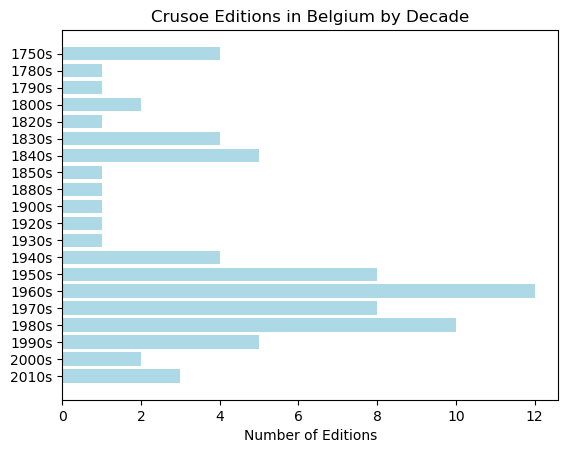

In [82]:
import matplotlib.pyplot as plt
import sys
import plotly
import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
plotly.tools.set_credentials_file(username='theplotter777', api_key='pjeRBmK06cNNy6viRKCL')

#dictionary = plt.figure()


import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

x = []
y = []

for foo in sorted(fivers.items(), key=itemgetter(0)):
    if 'A' in foo[0]:
        break
    x.append(foo[0] + "0s")
    y.append(foo[1])

y[0] = 4
y_pos = np.arange(len(x))

ax.barh(y_pos, y, align='center',
        color='lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Editions')
ax.set_title('Crusoe Editions in Belgium by Decade')

plt.show()

In [77]:
with open('cartoStuff.csv', 'w', encoding='utf8', newline='') as cartoHit:
    writer = csv.writer(cartoHit)
    writer.writerows(cartostuff)

In [89]:
for y in notcities:
    for x in set(cities):
        if fuzz.ratio(x,y) > 80:
            print(y, x)
            break

Sanktpeterburg sankt petersburg
Sanktpeterburg sankt petersburg
Wurtzburg wurzburg
Sanktpeterburg sankt petersburg
Sanktpeterburg sankt petersburg
Sanktpeterburg sankt petersburg
València valencia
València valencia
Sanktpeterburg sankt petersburg
València valencia
Franckfurt frankfurt
İstanbul istanbuul
İstanbul istanbuul
İstanbul istanbuul
İstanbul istanbuul
İstanbul istanbuul
Franckfurt frankfurt


In [68]:
def testbinarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False
    
    while first<=last and not found:
        midpoint = (first + last)//2
        
        #if item in alist[midpoint]:
        if fuzz.token_set_ratio(item, alist[midpoint]) > 85 or levenshtein(item, alist[midpoint]) == 1:    
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    return found

False